# Quantum coined walk

In this notebook, we are presenting some examples of quantum walk on the line. The walk operation U is composed of two sub-operations : 

$U= S(C\otimes I)$

Where $C$ is the coin gate applied on the coin space. It's result gives the direction of the walk (right or left). $S$ is the shift gate : depending of the result of the coin (the given direction), the position register is incremented or descremented.



#### References :
- Portugal, R. (2019). Quantum Walks and Search Algorithms - Second Edition (Softcover reprint of the original 2nd ed. 2018 éd.). Springer.
- Carneiro, I., Loo, M., Xu, X., Girerd, M., Kendon, V., & Knight, P. L. (2005). Entanglement in coined quantum walks on regular graphs. New Journal of Physics, 7, 156. https://doi.org/10.1088/1367-2630/7/1/156

In [1]:
from qiskit import *
import numpy as np
from qiskit.quantum_info.operators import Operator
from qiskit.circuit.gate import *
import matplotlib.pyplot as plt
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit import Gate

/home/jlucas/.local/lib/python3.6/site-packages/qiskit/__init__.py:66: DeprecationWarning: Using Qiskit with Python 3.6 is deprecated as of qiskit-terra 0.17.0. Support for running Qiskit with Python 3.6 will be removed in qiskit-terra 0.20.0.
  DeprecationWarning,


## Useful gates

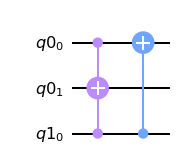

In [2]:
def increment_gate(n, m=1):
    q_r = QuantumRegister(n)
    q_c = QuantumRegister(m)
    inc = QuantumCircuit(q_r, q_c, name='Inc')
    for i in range(n-1,0, -1):
        inc.mct(q_r[:i]+q_c[:], q_r[i])
    inc.mct(q_c[:], q_r[0])
    
    return inc

increment_gate(2).draw(output ='mpl')

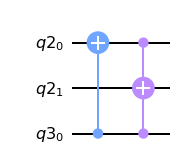

In [3]:
def decrement_gate(n, m=1):
    q_r = QuantumRegister(n)
    q_c = QuantumRegister(m)
    dec = QuantumCircuit(q_r, q_c, name='Dec')
    
    dec.mct(q_c[:], q_r[0])
    for i in range(1,n):
        dec.mct(q_r[:i]+q_c[:], q_r[i])
        
    return dec

decrement_gate(2).draw(output ='mpl')

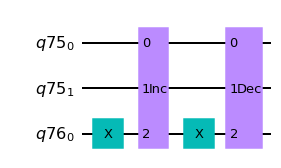

In [12]:
def shift_gate(n):
    q_r = QuantumRegister(n)
    q_c = QuantumRegister(1)
    shift = QuantumCircuit(q_r, q_c, name='Shift')
    # if |coin> =|0> then increment register position
    shift.x( q_c[0])
    shift.append(increment_gate(n), q_r[:] + q_c[:])
    shift.x( q_c[0])
    # if |coin> =|1> then decrement register position
    shift.append(decrement_gate(n), q_r[:] + q_c[:])
    
    return shift

shift_gate(2).draw(output ='mpl')

## Useful functions

In [7]:
def simulate(circuit):
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(circuit, backend = simulator).result()
    counts = result.get_counts(circuit)
    return counts

In [8]:
def show_dec_bar(t,n,counts, m=1):
    x= range(-t, t+1)
    y= [0]*(2*t+1)
    for num in list(counts.keys()) :
        no = int(num[m+1:], base = 2)
        no = no if no<=2**(n-1) else no-(2**n)
        y[no+t]+= counts[num]
    y=np.array(y)/sum(y)

    plt.bar(x,y, alpha = 1)

## Coined walk with $|+>$ coin

We applie 

$U=S\cdot C$ 

to the initial state of the coin :

$\left|{\psi _c}_0\right\rangle = \left|0\right\rangle $

where :

$C = H$, the Hadamard operator

$S$ the shift operator defined as :

$S \left|0\right\rangle  \left|i\right\rangle  = \left|0\right\rangle  \left|i+1\right\rangle $


$S \left|1\right\rangle  \left|i\right\rangle  = \left|1\right\rangle  \left|i-1\right\rangle $

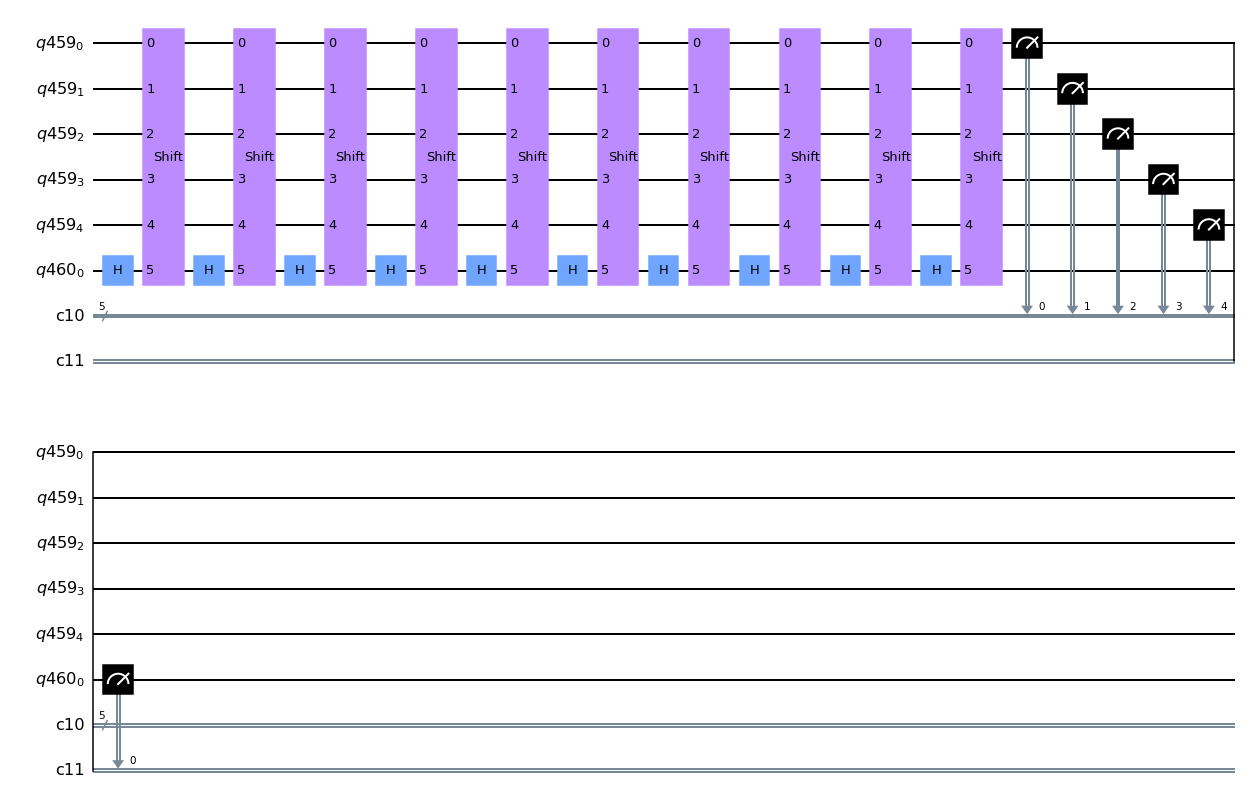

In [27]:
t = 10
n = 5
q_reg = QuantumRegister(n)
q_coin = QuantumRegister(1)
c_reg = ClassicalRegister(n)
c_coin = ClassicalRegister(1)

circuit = QuantumCircuit(q_reg, q_coin, c_reg, c_coin )

for _ in range(t):
    circuit.h(q_coin[0])
    circuit.append(shift_gate(n), q_reg[:] + q_coin[:])

circuit.measure(q_reg, c_reg )
circuit.measure(q_coin, c_coin )

circuit.draw(output ='mpl')

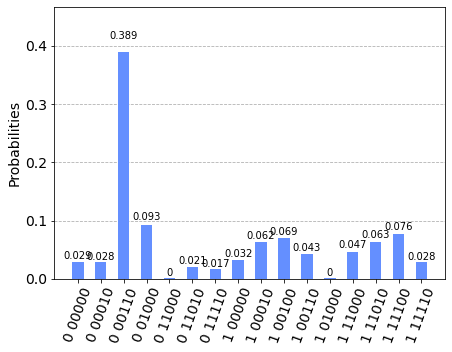

In [28]:
counts = simulate(circuit)
plot_histogram(counts)

Text(0, 0.5, 'probabilities')

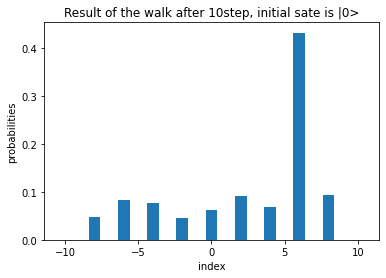

In [30]:
show_dec_bar(t,n,counts)
plt.title("Result of the walk after "+str(t)+ "step, initial sate is |0>")
plt.xlabel('index')
plt.ylabel('probabilities')

### Evolution 

![SegmentLocal](figures/Hadamard_+_coin.gif "segment")

## Coined walk with $|->$ coin


to the initial state of the coin is now defined as :

$\left|{\psi _c}_0\right\rangle = \left|0\right\rangle $


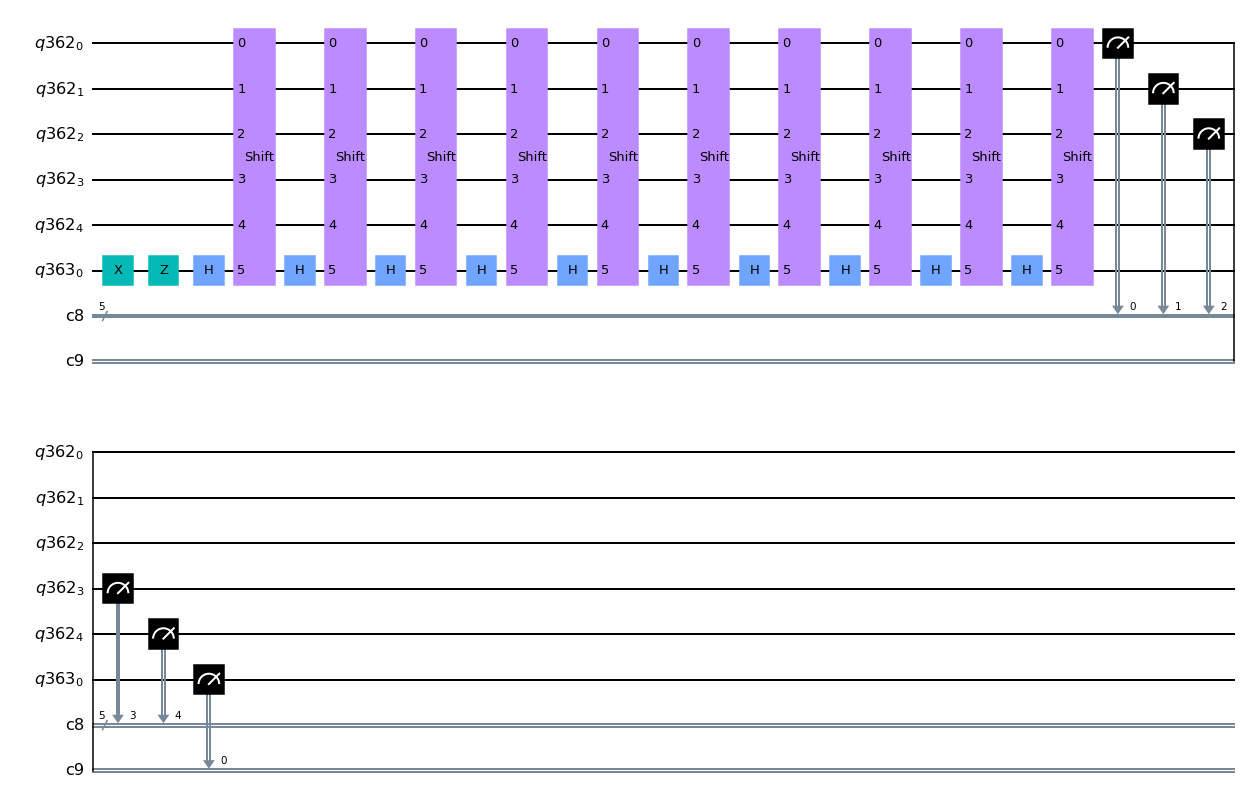

In [23]:
t = 10
n = 5
q_reg = QuantumRegister(n)
q_coin = QuantumRegister(1)
c_reg = ClassicalRegister(n)
c_coin = ClassicalRegister(1)

circuit = QuantumCircuit(q_reg, q_coin, c_reg, c_coin )

circuit.x(q_coin[:])
circuit.z(q_coin[:])

for _ in range(t):
    circuit.h(q_coin[0])
    circuit.append(shift_gate(n), q_reg[:] + q_coin[:])

circuit.measure(q_reg, c_reg )
circuit.measure(q_coin, c_coin )


circuit.draw(output ='mpl')

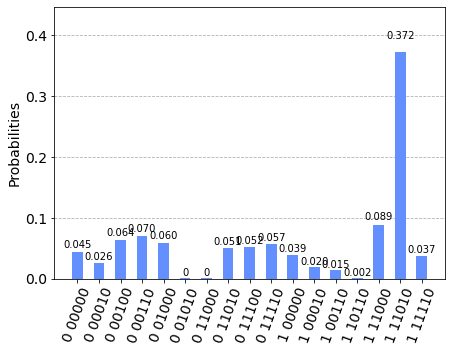

In [24]:
counts = simulate(circuit)
plot_histogram(counts)

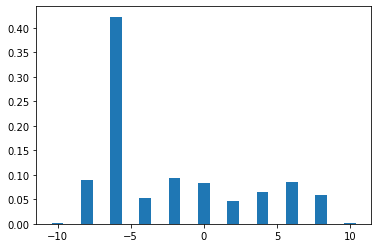

In [25]:
show_dec_bar(t,n,counts)
plt.title("Result of the walk after "+str(t)+ "step, initial sate is |1>")
plt.xlabel('index')
plt.ylabel('probabilities')

#### Evolution 

![SegmentLocal](figures/Hadamard_-_coin.gif "segment")

## Balanced coin

to the initial state of the coin is now defined as :

$\left|{\psi _c}_0\right\rangle = (\left|0\right\rangle + \left|1\right\rangle)/\sqrt2 $


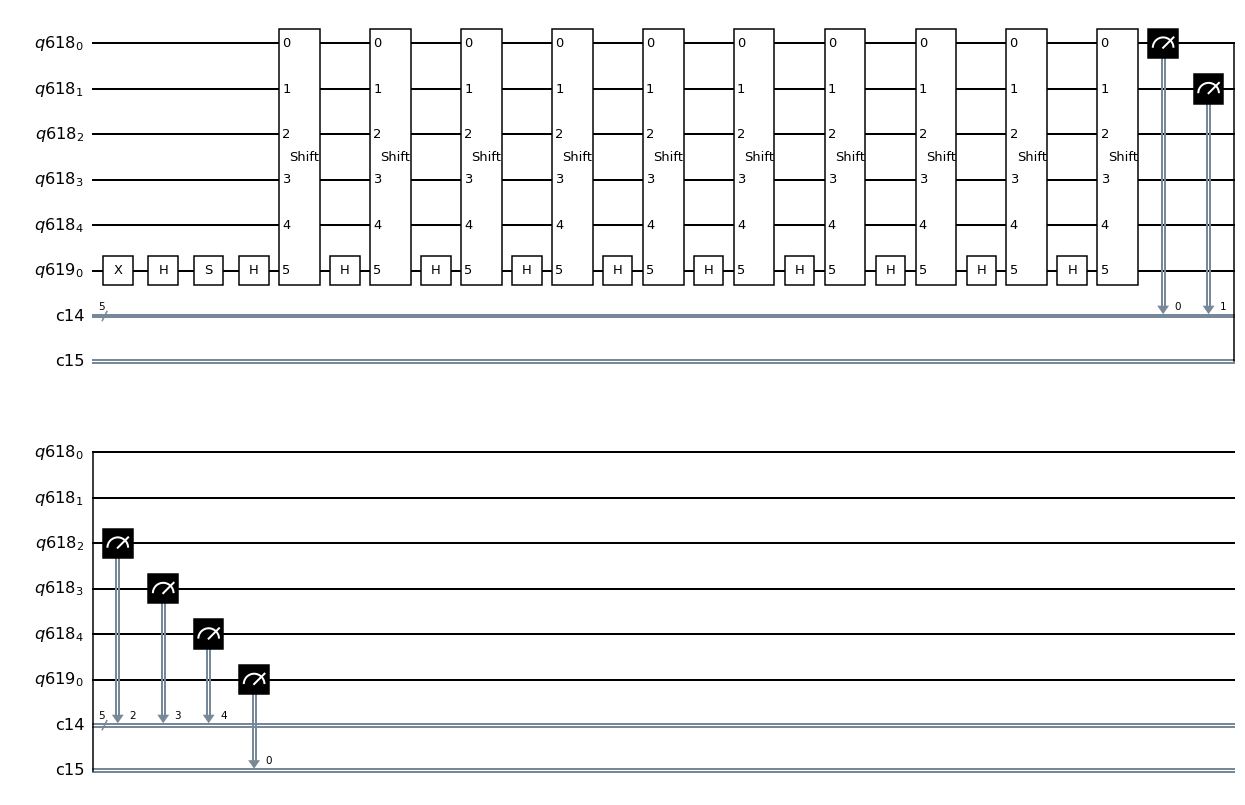

In [35]:
t = 10
n = 5
q_reg = QuantumRegister(n)
q_coin = QuantumRegister(1)
c_reg = ClassicalRegister(n)
c_coin = ClassicalRegister(1)

circuit = QuantumCircuit(q_reg, q_coin, c_reg, c_coin )

circuit.x(q_coin[:])
circuit.h(q_coin[:])
circuit.s(q_coin[:])

for _ in range(t):
    circuit.h(q_coin[0])
    circuit.append(shift_gate(n), q_reg[:] + q_coin[:])

circuit.measure(q_reg, c_reg )
circuit.measure(q_coin, c_coin )


circuit.draw(output ='mpl', style="bw", filename ='balanced_coin.png')

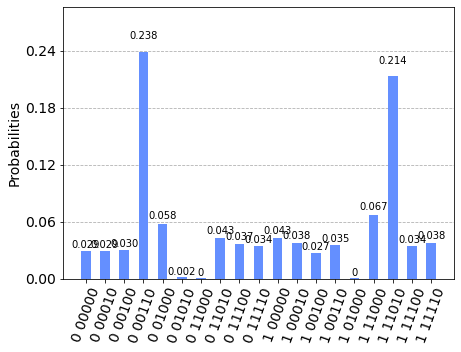

In [36]:
counts = simulate(circuit)
plot_histogram(counts)

Text(0, 0.5, 'probabilities')

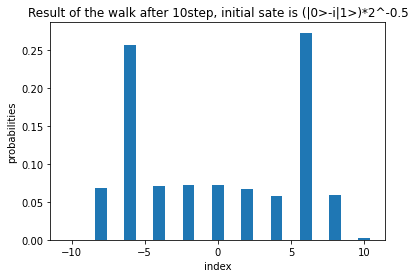

In [37]:
show_dec_bar(t,n,counts)
plt.title("Result of the walk after "+str(t)+ "step, initial sate is (|0>-i|1>)*2^-0.5")
plt.xlabel('index')
plt.ylabel('probabilities')

### Evolution :

![SegmentLocal](figures/balanced_coin.gif "segment")